# Kothai Niveda M
## ReneWind


Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generator could be repaired before failing/breaking to reduce the maintenance cost. The different costs associated with maintenance are as follows:

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing libraries

In [37]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading Data

In [38]:
#Loading dataset
data = pd.read_csv('Train.csv')
data_t = pd.read_csv('Test.csv') 

## Data Overview

- Observations
- Sanity checks

**View the first 5 rows of the dataset.**

In [39]:
# Viewing the first 5 rows of the dataset
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,-2.910,-2.569,4.109,1.317,-1.621,-3.827,-1.617,0.669,0.387,0.854,-6.353,4.272,3.162,0.258,-3.547,-4.285,2.897,1.508,3.668,7.124,-4.096,1.015,-0.970,-0.968,2.064,-1.646,0.427,0.735,-4.470,-2.772,-2.505,-3.783,-6.823,4.909,0.482,5.338,2.381,-3.128,3.527,-3.020,0
2,4.284,5.105,6.092,2.640,-1.041,1.308,-1.876,-9.582,3.470,0.763,-2.573,-3.350,-0.595,-5.247,-4.310,-16.232,-1.000,2.318,5.942,-3.858,-11.599,4.021,-6.281,4.633,0.930,6.280,0.851,0.269,-2.206,-1.329,-2.399,-3.098,2.690,-1.643,7.566,-3.198,-3.496,8.105,0.562,-4.227,0
3,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
4,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0


**View the last 5 rows of the dataset.**

In [40]:
# Viewing the last 5 rows of the dataset
data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
39995,-3.897,-3.942,-0.351,-2.417,1.108,-1.528,-3.520,2.055,-0.234,-0.358,-3.782,2.180,6.112,1.985,-8.330,-1.639,-0.915,5.672,-3.924,2.133,-4.502,2.777,5.728,1.620,-1.700,-0.042,-2.923,-2.760,-2.254,2.552,0.982,7.112,1.476,-3.954,1.856,5.029,2.083,-6.409,1.477,-0.874,0
39996,-3.187,-10.052,5.696,-4.370,-5.355,-1.873,-3.947,0.679,-2.389,5.457,1.583,3.571,9.227,2.554,-7.039,-0.994,-9.665,1.155,3.877,3.524,-7.015,-0.132,-3.446,-4.801,-0.876,-3.812,5.422,-3.732,0.609,5.256,1.915,0.403,3.164,3.752,8.530,8.451,0.204,-7.130,4.249,-6.112,0
39997,-2.687,1.961,6.137,2.600,2.657,-4.291,-2.344,0.974,-1.027,0.497,-9.589,3.177,1.055,-1.416,-4.669,-5.405,3.720,2.893,2.329,1.458,-6.429,1.818,0.806,7.786,0.331,5.257,-4.867,-0.819,-5.667,-2.861,4.674,6.621,-1.989,-1.349,3.952,5.450,-0.455,-2.202,1.678,-1.974,0
39998,0.521,0.096,8.457,2.138,-1.636,-2.713,-2.693,-3.410,1.936,2.012,-4.989,-0.819,4.166,-1.192,-5.033,-8.523,-1.950,0.017,4.505,2.031,-8.849,0.566,-6.040,-0.043,1.656,4.250,1.727,-1.686,-3.963,-2.642,1.939,-1.257,-1.136,1.434,5.905,3.752,-1.867,-1.918,2.573,-5.019,0
39999,2.403,-1.336,6.451,-5.356,-0.434,0.255,-1.120,-2.523,-0.654,2.316,-2.862,0.199,1.593,-0.337,-0.709,-4.408,-3.683,2.973,-1.223,-1.958,-4.454,0.464,-4.952,-1.624,2.965,2.009,5.712,-2.910,-2.287,-3.676,5.678,-4.310,-0.709,-1.359,1.639,7.766,-0.245,-1.124,2.872,1.902,0


**Understanding the shape of the dataset**

In [41]:
# Viewing the shape of the train dataset
data.shape

(40000, 41)

In [42]:
# Viewing the shape of the test dataset
data_t.shape

(10000, 41)

#### Observations:
* The train dataset has 40000 rows and 41 columns.
* The test dataset has 10000 rows and 41 columns.

**Check data types and number of non-null values for each column.**

In [43]:
# use info() to print a concise summary of the DataFrame of the train set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

In [44]:
# use info() to print a concise summary of the DataFrame of the test set 
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      9989 non-null   float64
 1   V2      9993 non-null   float64
 2   V3      10000 non-null  float64
 3   V4      10000 non-null  float64
 4   V5      10000 non-null  float64
 5   V6      10000 non-null  float64
 6   V7      10000 non-null  float64
 7   V8      10000 non-null  float64
 8   V9      10000 non-null  float64
 9   V10     10000 non-null  float64
 10  V11     10000 non-null  float64
 11  V12     10000 non-null  float64
 12  V13     10000 non-null  float64
 13  V14     10000 non-null  float64
 14  V15     10000 non-null  float64
 15  V16     10000 non-null  float64
 16  V17     10000 non-null  float64
 17  V18     10000 non-null  float64
 18  V19     10000 non-null  float64
 19  V20     10000 non-null  float64
 20  V21     10000 non-null  float64
 21  V22     10000 non-null  float64
 22 

#### Observations:
- We can see that there are total of 41 columns in the dataset.
- Except for the target which is of int64 data type, all the other columns' data types are float64. 
- There are missing values in columns V1 and V2 in both train and test sets. We can further find this using `isna()` method.

**Check missing values for each column.**

In [45]:
# Checking missing values for each column in train set.
data.isna().sum()

V1        46
V2        39
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [46]:
# Checking missing values for each column in test set.
data_t.isna().sum()

V1        11
V2         7
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

#### Observations:
- There are missing values in the data for columns V1 and V2 in both train and test sets which we will treat later.

**Duplicate value check**

In [47]:
# Checking for any duplicate values in train set.
data.duplicated().sum()

0

In [48]:
# Checking for any duplicate values in test set.
data_t.duplicated().sum()

0

#### Observations:
- There are no duplicate values in both train and test sets.

**Summary of the dataset**

In [49]:
# This code will show us a summary of both numerical and non-numerical variables in train set.
# .T gives us a transpose of the matrix for better visualization.

data.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
V1,39954.000,-0.288,3.449,-13.502,-2.751,-0.774,1.837,17.437
V2,39961.000,0.443,3.139,-13.212,-1.638,0.464,2.538,13.089
V3,40000.000,2.506,3.406,-11.469,0.203,2.265,4.585,18.366
V4,40000.000,-0.066,3.437,-16.015,-2.350,-0.124,2.149,13.280
V5,40000.000,-0.045,2.107,-8.613,-1.507,-0.097,1.346,9.403
V6,40000.000,-1.001,2.037,-10.227,-2.363,-1.007,0.374,7.065
V7,40000.000,-0.893,1.757,-8.206,-2.037,-0.935,0.207,8.006
V8,40000.000,-0.563,3.299,-15.658,-2.660,-0.384,1.714,11.679
V9,40000.000,-0.008,2.162,-8.596,-1.494,-0.052,1.426,8.507
V10,40000.000,-0.002,2.183,-11.001,-1.391,0.106,1.486,8.108


In [50]:
# This code will show us a summary of both numerical and non-numerical variables in test set.
# .T gives us a transpose of the matrix for better visualization.

data_t.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
V1,9989.000,-0.260,3.440,-12.382,-2.700,-0.719,1.861,13.504
V2,9993.000,0.417,3.160,-11.625,-1.701,0.456,2.526,14.079
V3,10000.000,2.555,3.395,-12.941,0.238,2.283,4.656,15.409
V4,10000.000,-0.054,3.462,-14.682,-2.371,-0.169,2.144,12.896
V5,10000.000,-0.085,2.102,-7.712,-1.593,-0.144,1.324,7.673
V6,10000.000,-1.014,2.039,-8.949,-2.377,-1.015,0.354,6.273
V7,10000.000,-0.908,1.737,-8.124,-2.035,-0.938,0.189,7.616
V8,10000.000,-0.599,3.343,-12.710,-2.684,-0.387,1.698,10.792
V9,10000.000,0.026,2.180,-7.570,-1.490,-0.086,1.466,8.851
V10,10000.000,0.019,2.169,-8.291,-1.362,0.150,1.537,7.691


#### Observations:
- As observed earlier, we notice some missing values for V1 and V2 in train and test sets.
- Majority of the target variable is 0 in both train and test sets.

## EDA

### Univariate analysis

In [51]:
# This function will give a boxplot and histogram combined along the same scale for any input numerical variable.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # We are going to have 2 rows for the subplot grid.
        sharex=True,  # this indicates x-axis will be shared among the subplots.
        gridspec_kw={"height_ratios": (0.25, 0.75)}, # the height ratio of the plots would be 1:3
        figsize=figsize,)
    
    # creating the 2 subplots
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # a boxplot will be plotted with 
    # a green triangle representing the mean value.
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2) # a histogram will be plotted with bins if specified in the input, 
    # else it will automatically plot it's own bins.
    
    # Adding mean and median lines for histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Adding mean line.
    ax_hist2.axvline(data[feature].median(), color="red", linestyle="-")  # Adding median line.

### Plotting all the features at one go

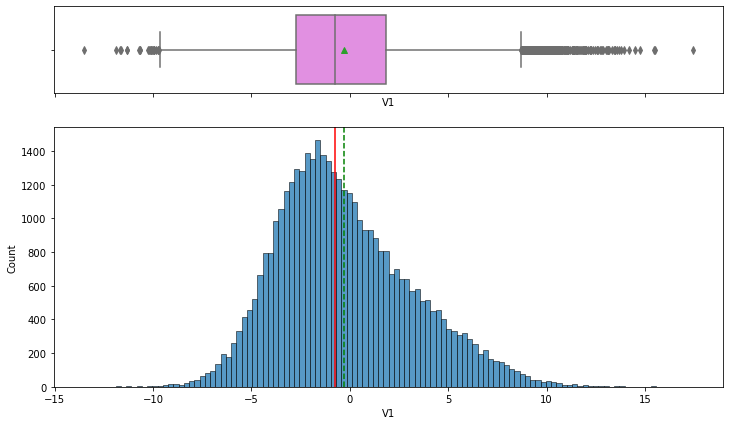

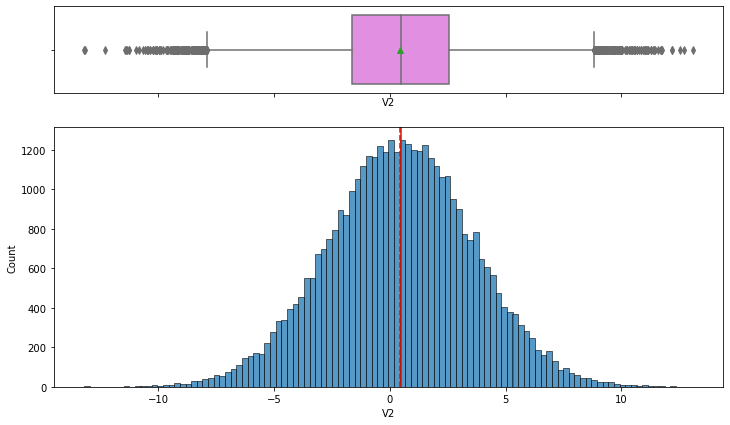

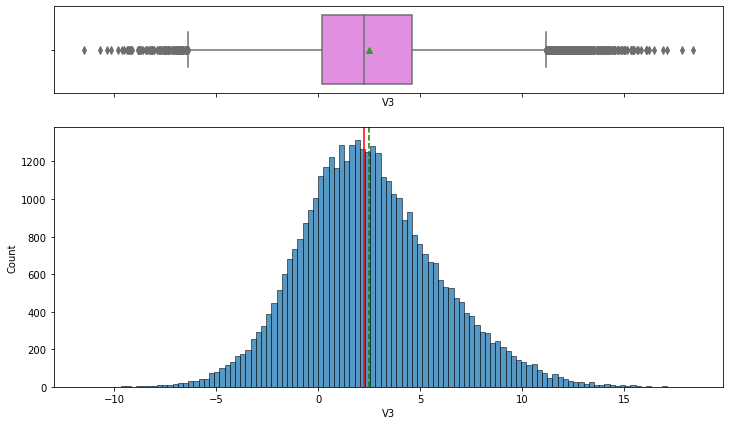

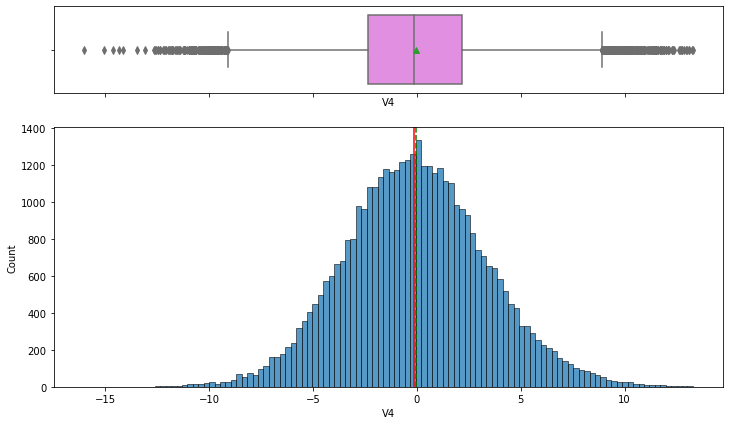

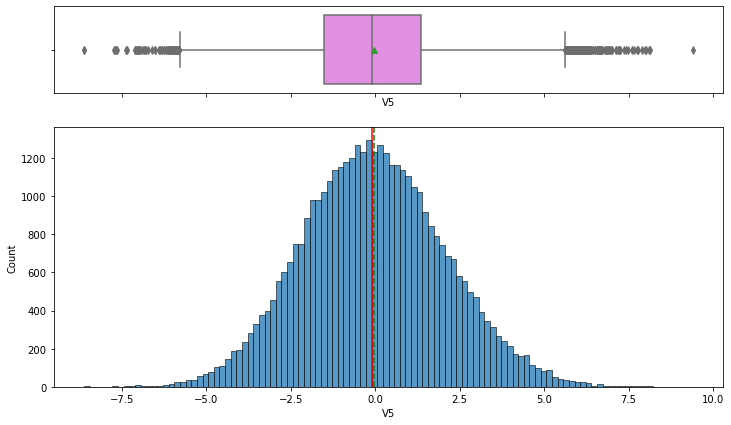

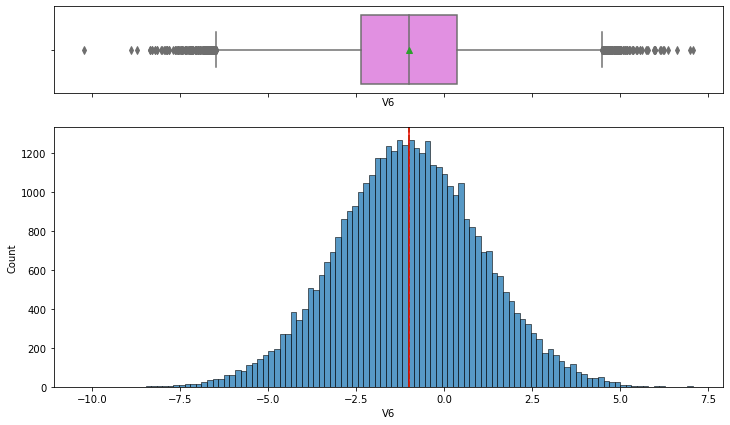

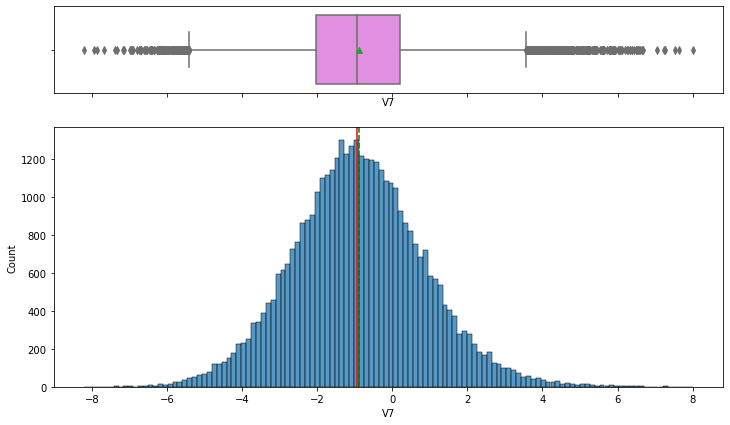

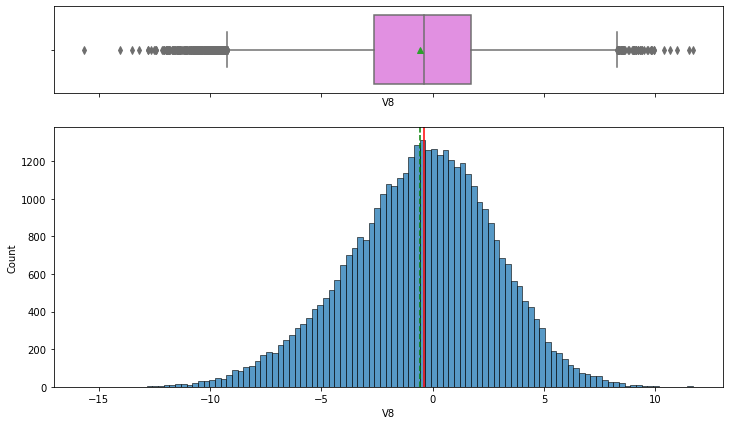

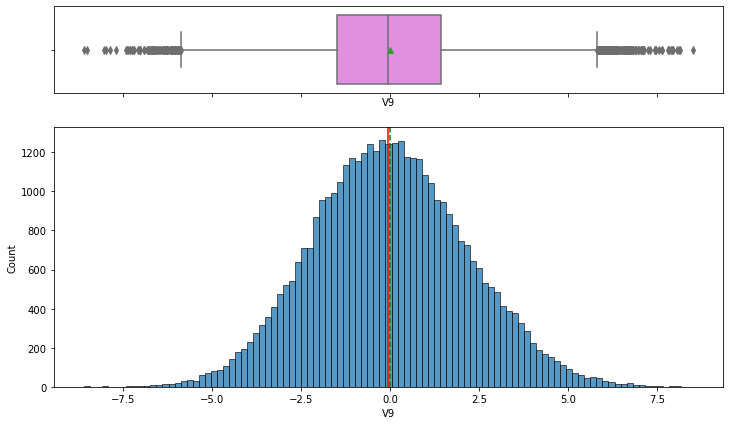

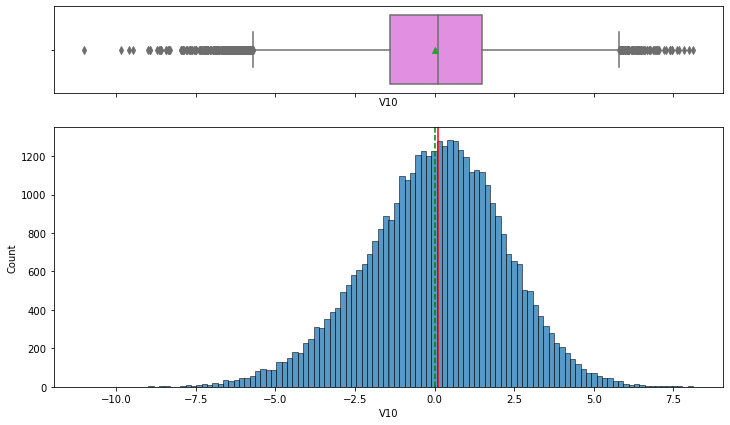

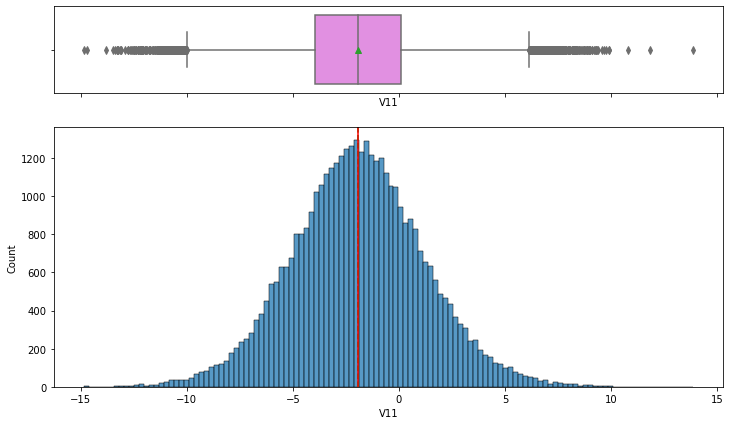

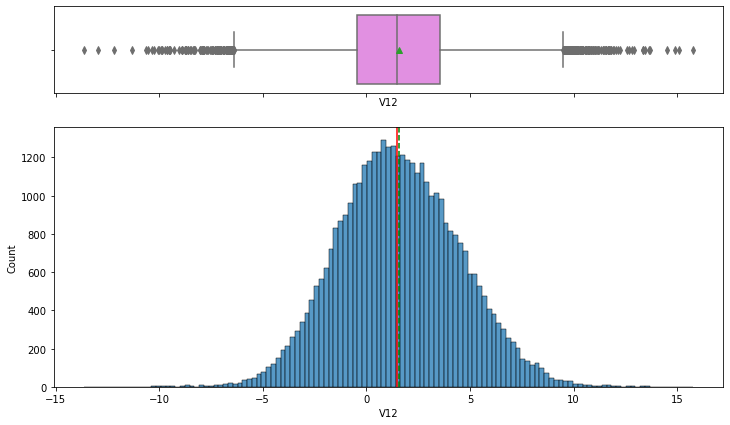

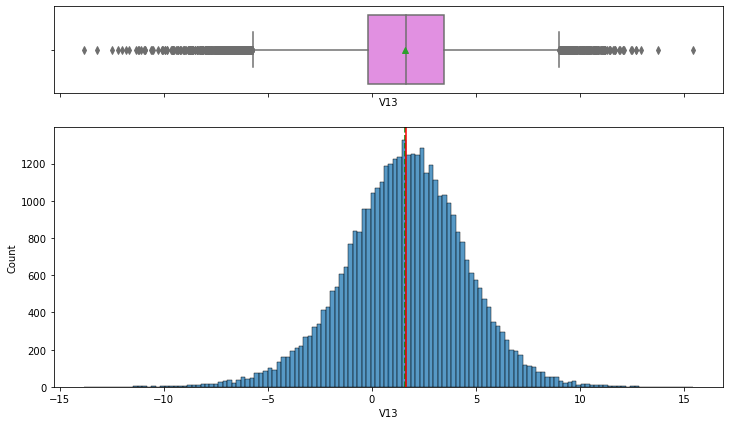

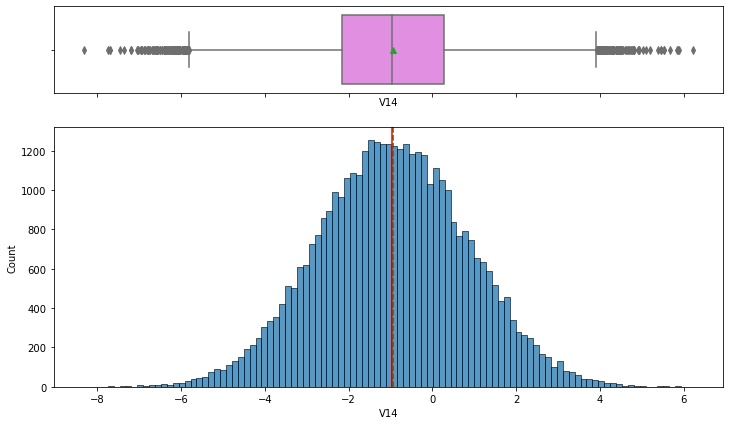

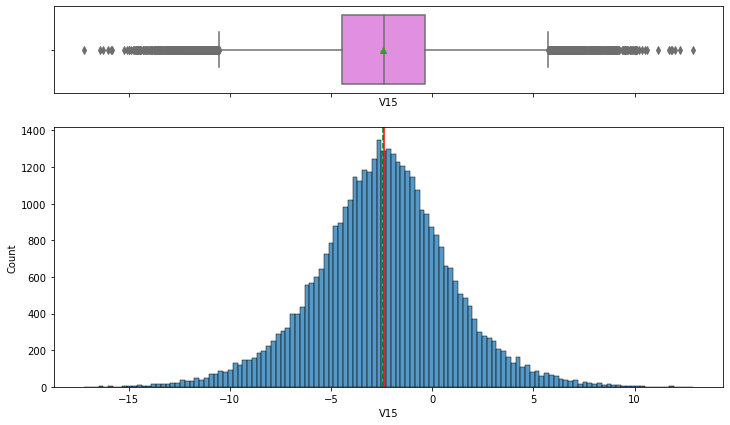

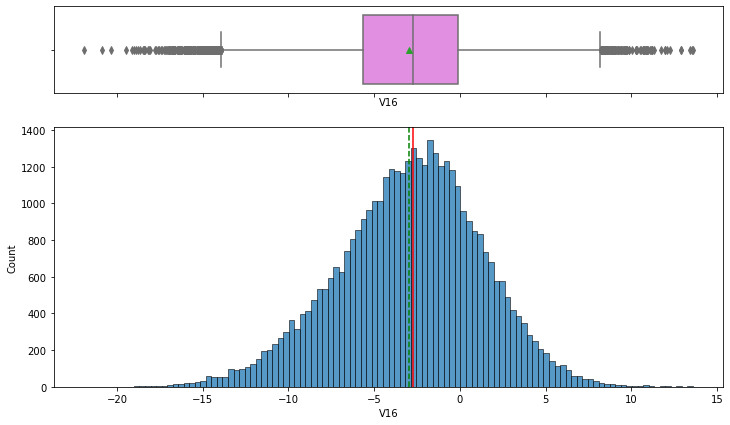

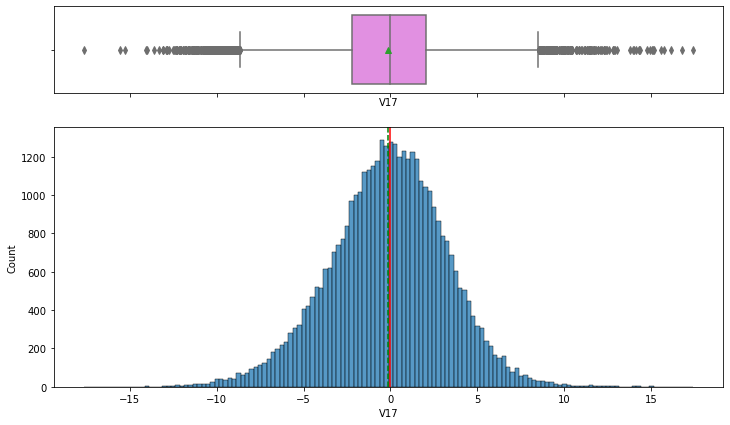

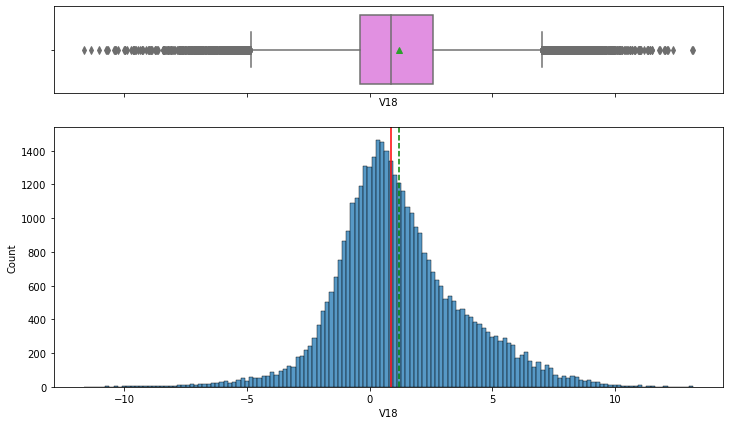

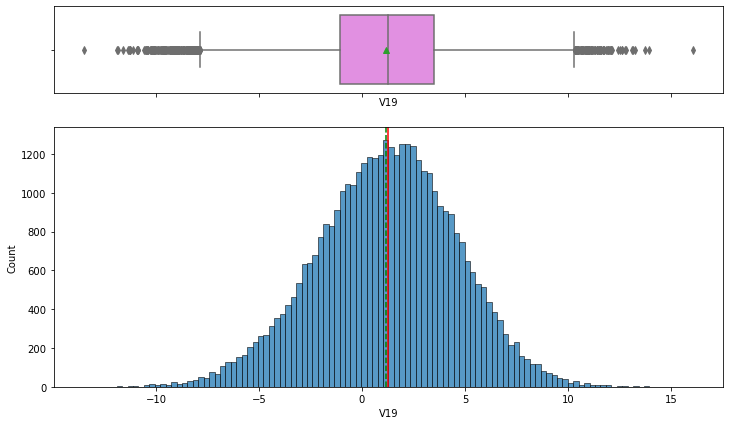

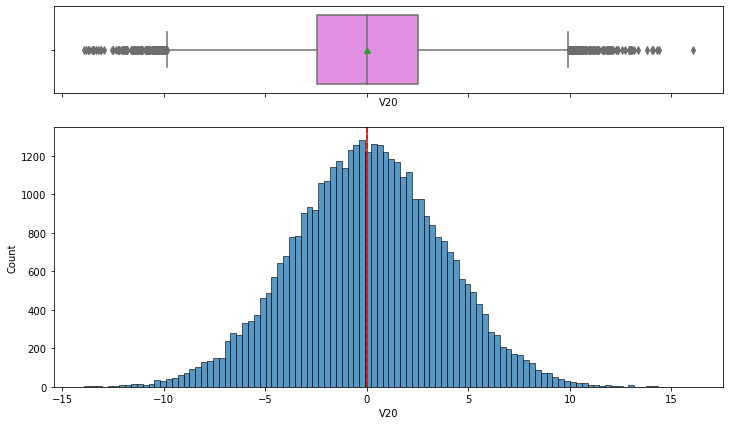

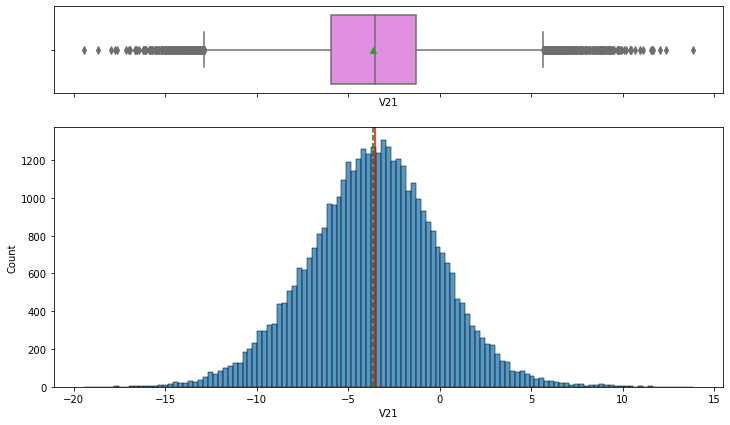

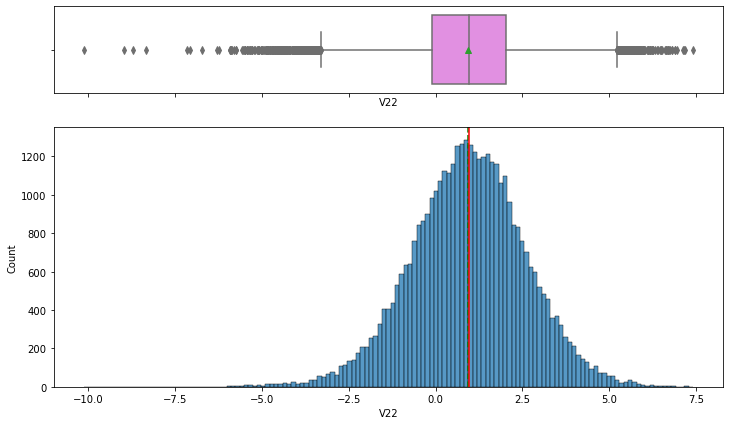

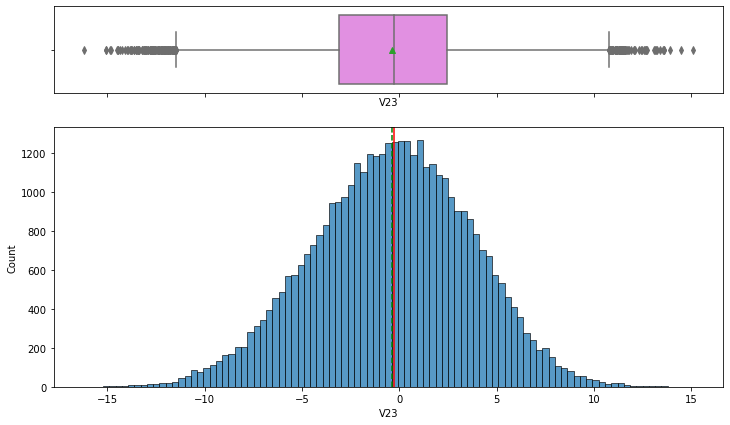

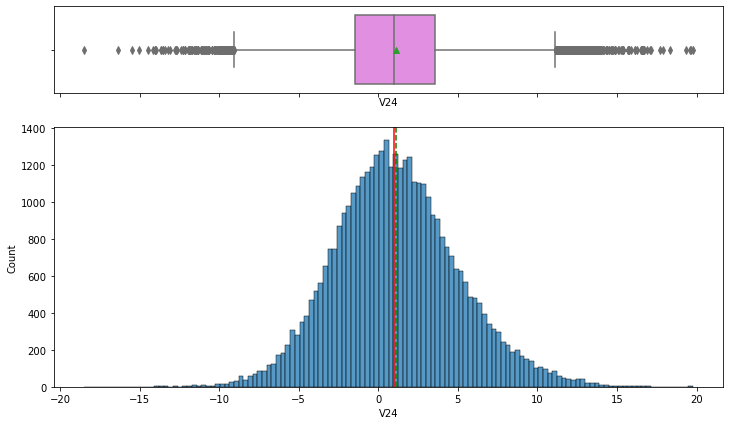

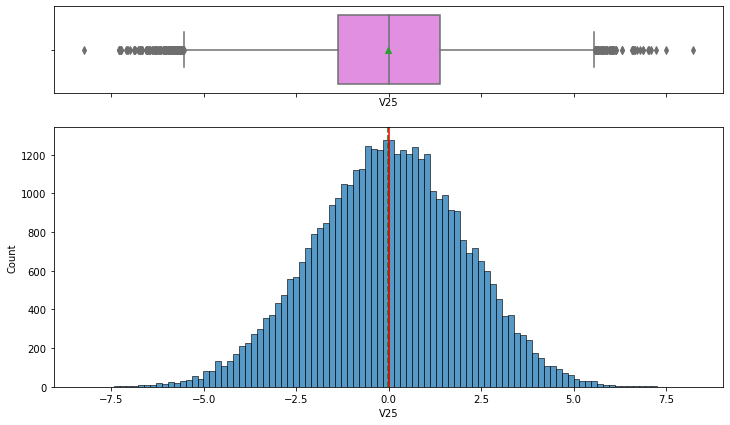

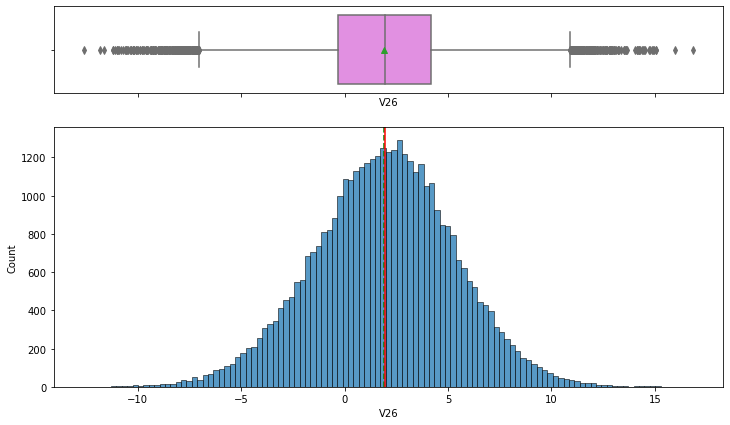

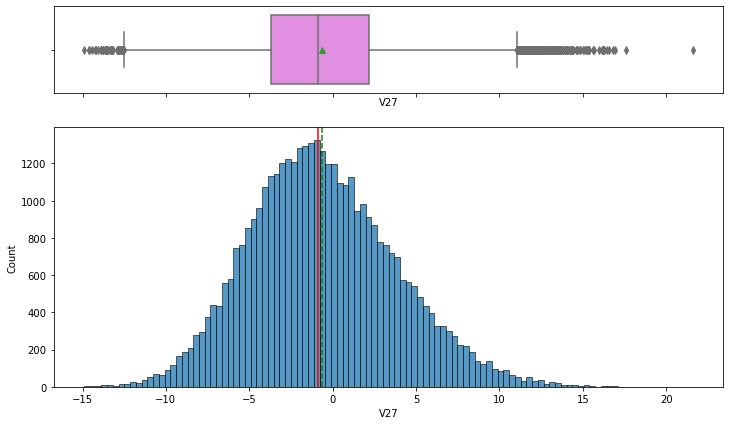

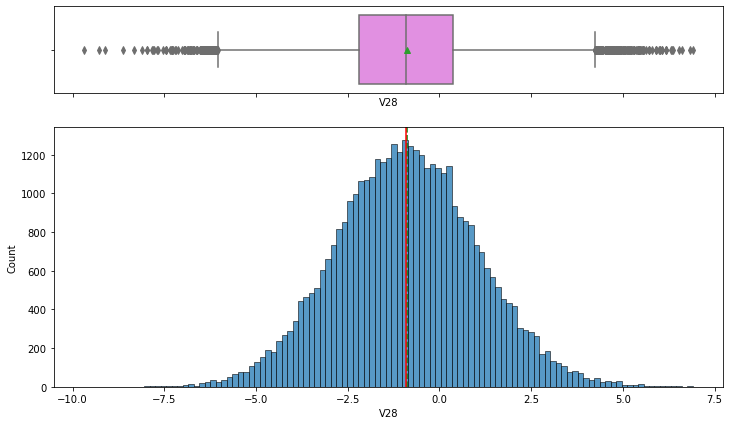

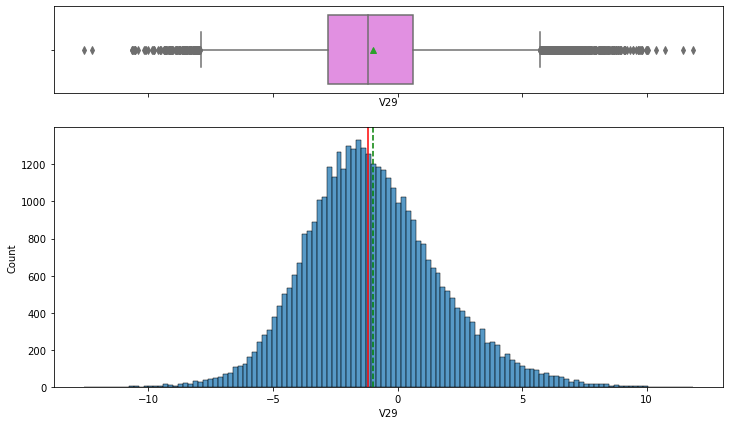

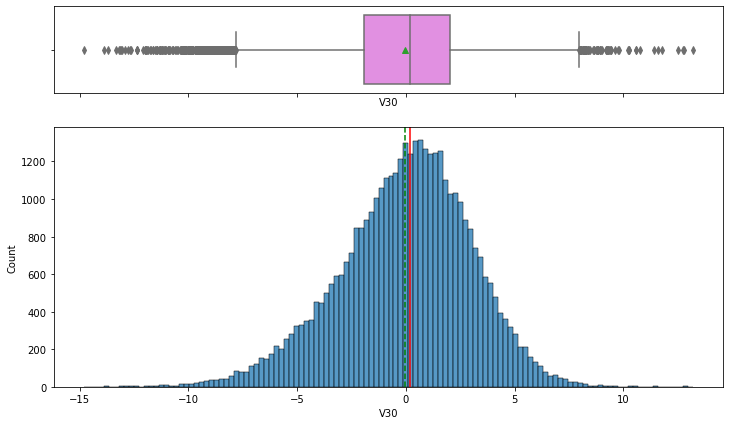

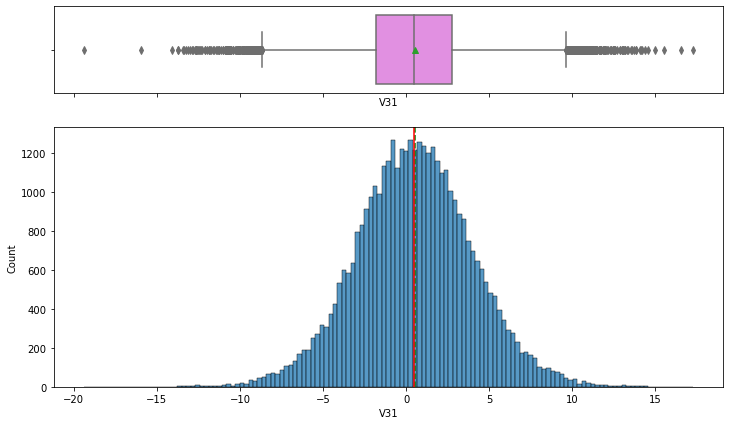

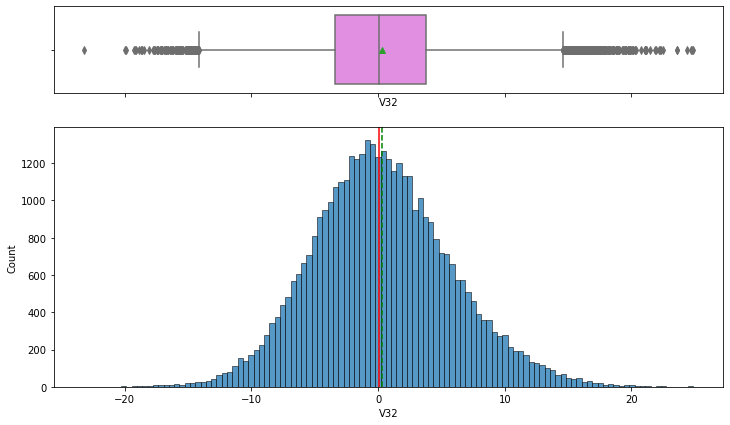

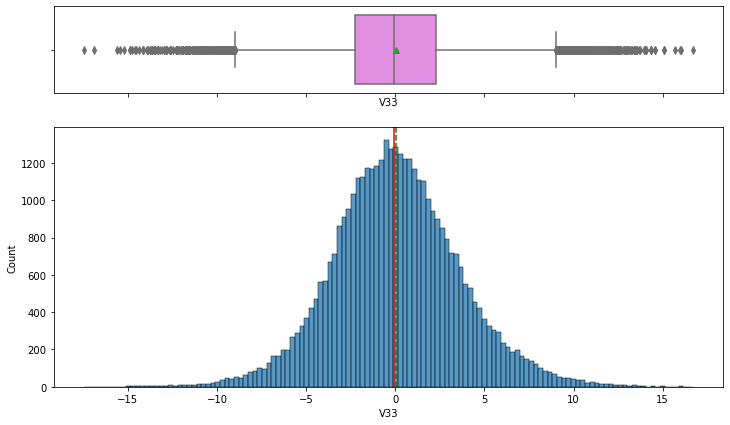

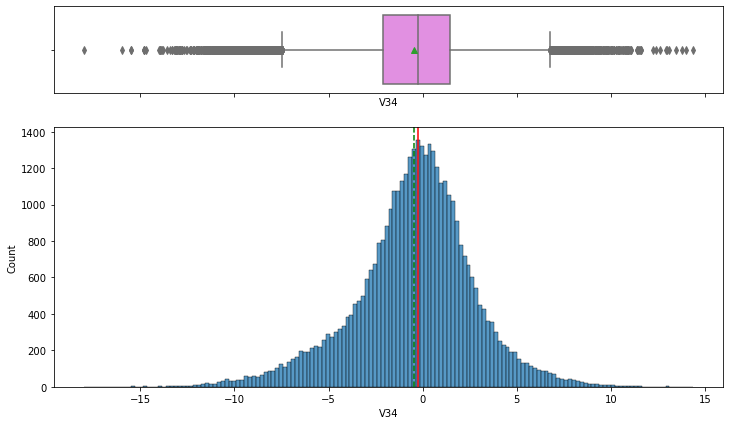

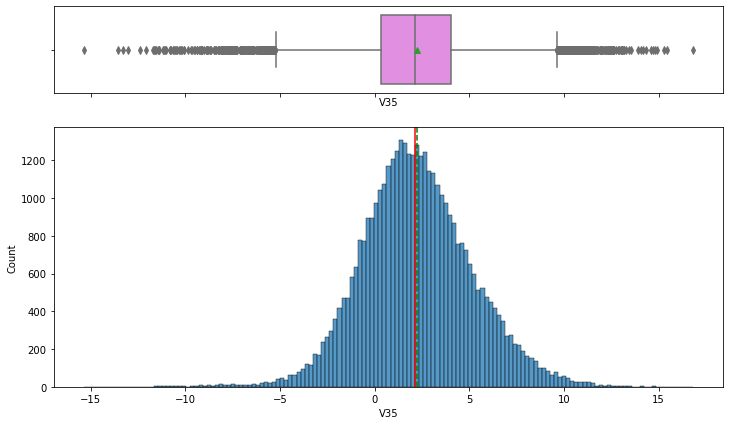

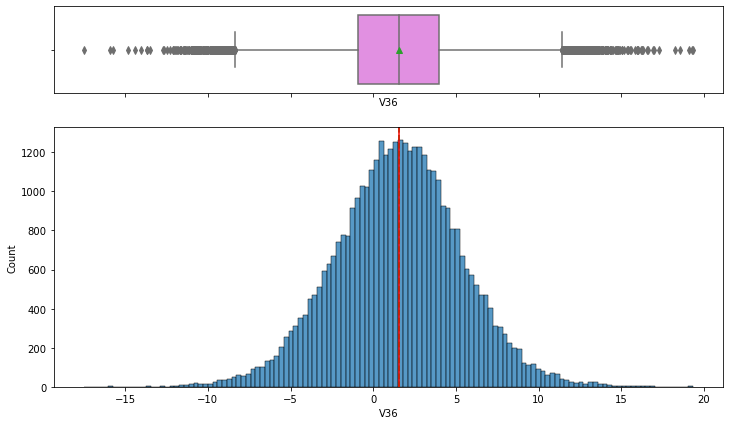

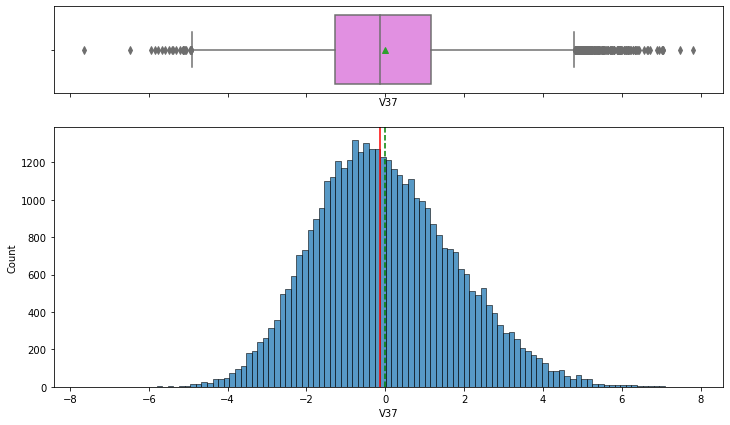

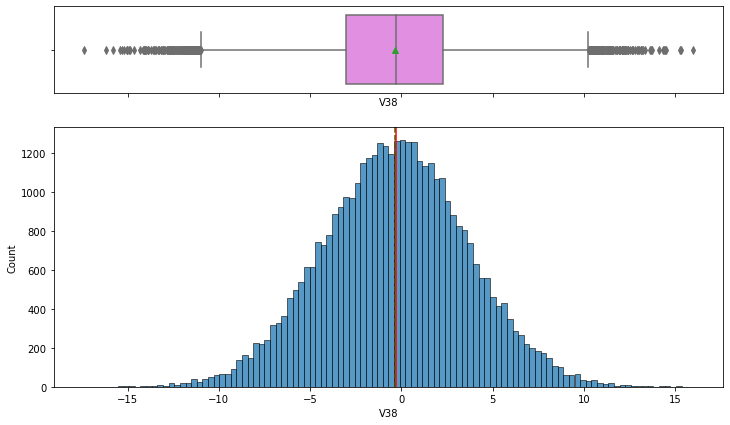

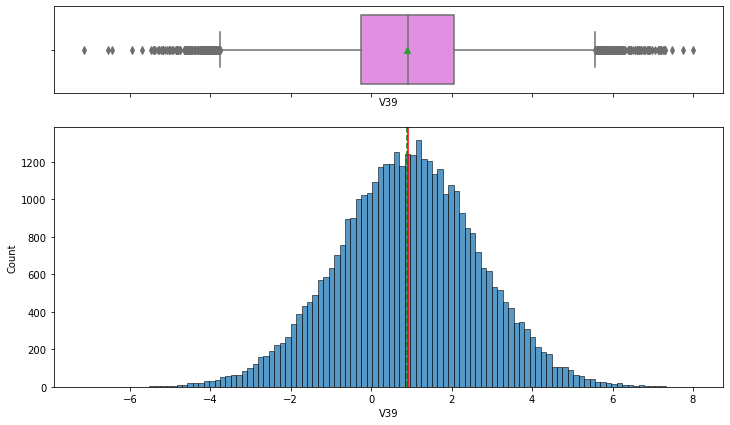

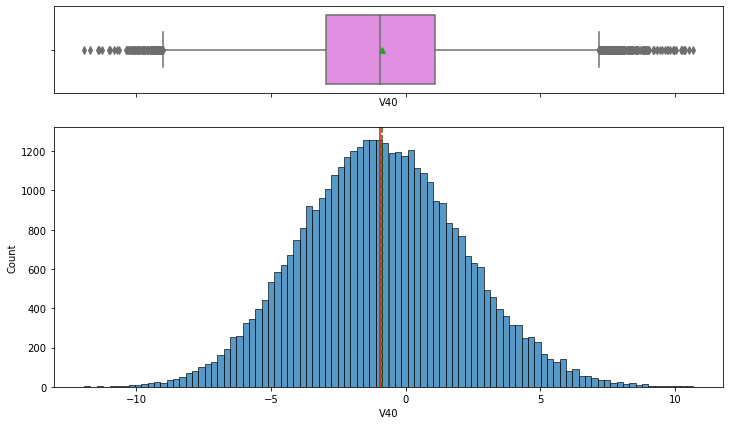

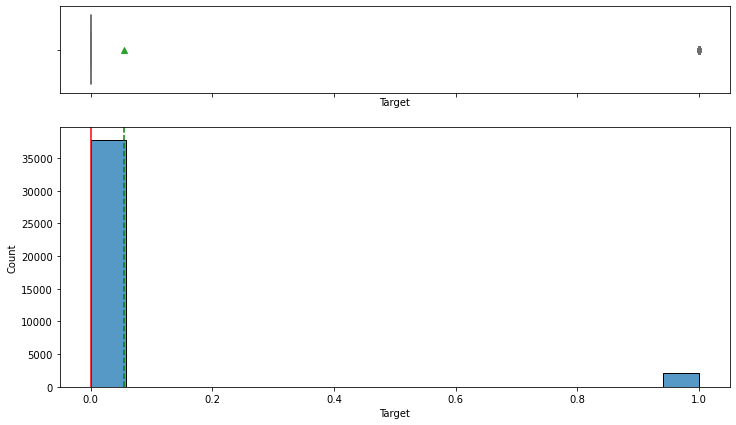

In [52]:
for feature in data.columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None)

#### Observations:
- Almost all independent variables have a bell-shaped curve distribution centered around the mean in their histograms. 
- Majority of the target avariable is 0 meaning no generator failure. 

### Heatmap

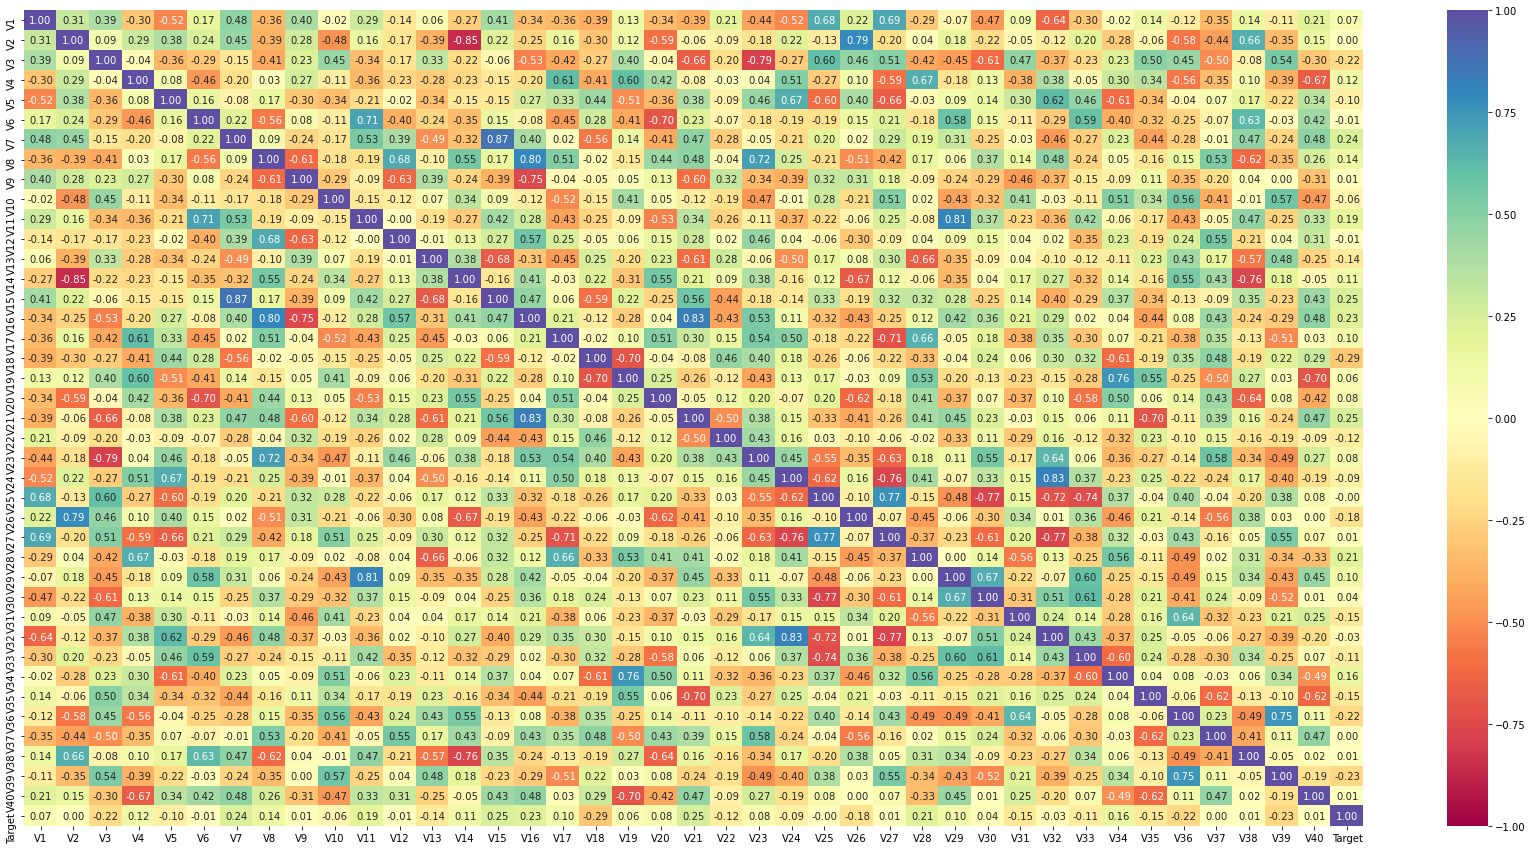

In [53]:
# plotting a heatmap of all numerical variables
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(30, 15))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations:
- Some variables are quite strongly correlated to one another.
- None of the variables are strongly correlated with the target. 

## Data Pre-processing

In [54]:
# Let's create a copy of the train data first 
df=data.copy()

In [55]:
# Let's create a copy of the test data first 
dft=data_t.copy()

### Splitting Data 

In [120]:
# Splitting data in train set
X = df.drop(["Target"], axis=1)
y = df["Target"]

In [121]:
# Splitting data in test set
X_test = dft.drop(["Target"], axis=1)
y_test = dft["Target"]

In [122]:
# Splitting data into training (75%) and validation set (25%):

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [123]:
# Getting information on train and test sets
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in training set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (30000, 40)
Shape of test set :  (10000, 40)
Shape of test set :  (10000, 40)
Percentage of classes in training set:
0   0.945
1   0.055
Name: Target, dtype: float64
Percentage of classes in training set:
0   0.945
1   0.055
Name: Target, dtype: float64
Percentage of classes in test set:
0   0.945
1   0.055
Name: Target, dtype: float64


#### Observations:
- We can see that the ratio of classes are the same in train, validation and test sets. 
- We also have a highly imbalanced dataset with 94.5% of target=0 and only 5.5% target=1

### Missing Value treatment

- We will use median to impute missing values in columns V1 and V2

In [124]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="median")

In [125]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns) 

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [128]:
# Checking that no column has missing values in train set
print(X_train.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64


In [129]:
# Checking that no column has missing values in validation set
print(X_val.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64


In [171]:
# Checking that no column has missing values in test set
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64


#### Observations:
- Now there are no missing values in train, validation and test sets.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [172]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
            
        },
        index=[0],
    )

    return df_perf

In [173]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [174]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

In [175]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Lg", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("bagging", BaggingClassifier(random_state=1)))
models.append(("rf", RandomForestClassifier(random_state=1)))
models.append(("abc", AdaBoostClassifier(random_state=1)))
models.append(("gbc", GradientBoostingClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Lg: 0.48292682926829267
dtree: 0.7335365853658538
bagging: 0.7347560975609755
rf: 0.7621951219512195
abc: 0.6164634146341463
gbc: 0.7170731707317073

Validation Performance:

Lg: 0.4625228519195612
dtree: 0.7477148080438757
bagging: 0.7349177330895795
rf: 0.7659963436928702
abc: 0.6142595978062158
gbc: 0.7148080438756855


### Comparing CV scores 

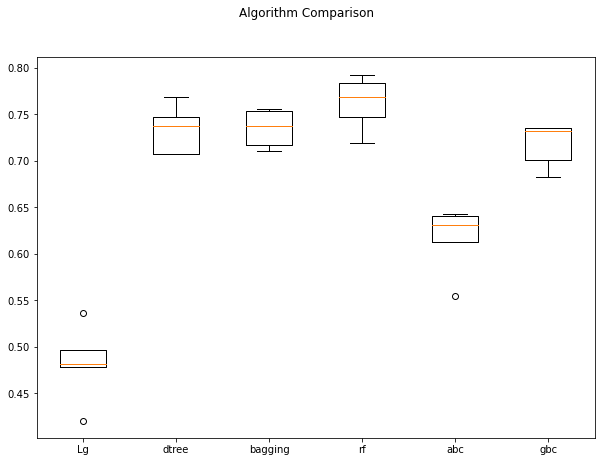

In [176]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

#### Observations:
- We can see that Random Forest is giving the highest cross-validated recall followed by Decision Tree and Bagging Classifier model.
- This is also seen in the validation performance where Random Forest performs the best followed by Decision Tree and Bagging Classifier model.

### Model Building with oversampled data


In [177]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [178]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 1640
Before OverSampling, counts of label '0': 28360 

After OverSampling, counts of label '1': 28360
After OverSampling, counts of label '0': 28360 

After OverSampling, the shape of train_X: (56720, 40)
After OverSampling, the shape of train_y: (56720,) 



#### Observations:
- Now we can see that after oversampling, the counts of target=1 has increased and is the same amount as target=0.
- The number of rows in train set has also increased from 30000 to 56720. 

#### Now lets build the models with oversampled data

In [179]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Lg", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("bagging", BaggingClassifier(random_state=1)))
models.append(("rf", RandomForestClassifier(random_state=1)))
models.append(("abc", AdaBoostClassifier(random_state=1)))
models.append(("gbc", GradientBoostingClassifier(random_state=1)))

results2 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results2.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Lg: 0.8754583921015515
dtree: 0.9722143864598026
bagging: 0.9730606488011284
rf: 0.9817348377997179
abc: 0.8933004231311706
gbc: 0.9148095909732017

Validation Performance:

Lg: 0.8391224862888482
dtree: 0.8135283363802559
bagging: 0.8354661791590493
rf: 0.8683729433272395
abc: 0.850091407678245
gbc: 0.8811700182815356


#### Comparing CV scores of models built with oversampled data

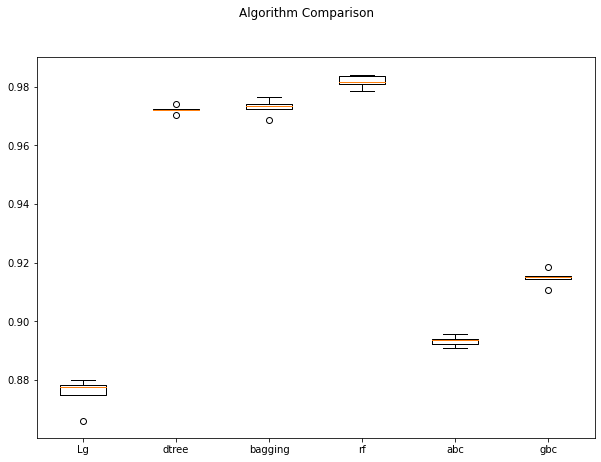

In [180]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names)

plt.show()

#### Observations:
- We can see that again Random Forest is giving the highest cross-validated recall followed by Bagging Classifier and Decision Tree model.
- The boxplot shows that the performance of Bagging Classifier is consistent with 1 outlier and with 2 outliers for Decision Tree model.
- However, in the validation performance, Gradient Boosting is giving best performance followed by Random Forest and Adaboost model.

### Model Building with Undersampled data

In [181]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [182]:
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 1640
Before UnderSampling, counts of label '0': 28360 

After UnderSampling, counts of label '1': 1640
After UnderSampling, counts of label '0': 1640 

After UnderSampling, the shape of train_X: (3280, 40)
After UnderSampling, the shape of train_y: (3280,) 



#### Observations:
- Now we can see that after undersampling, the counts of target=0 has decreased and is the same amount as target=1.
- The number of rows in train set has also decreased from 30000 to 3280. 

#### Now lets build the models with undersampled data

In [183]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Lg", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("bagging", BaggingClassifier(random_state=1)))
models.append(("rf", RandomForestClassifier(random_state=1)))
models.append(("abc", AdaBoostClassifier(random_state=1)))
models.append(("gbc", GradientBoostingClassifier(random_state=1)))

results3 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results3.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Lg: 0.8554878048780488
dtree: 0.8591463414634146
bagging: 0.875
rf: 0.8981707317073171
abc: 0.8725609756097562
gbc: 0.8871951219512194

Validation Performance:

Lg: 0.8464351005484461
dtree: 0.8537477148080439
bagging: 0.8628884826325411
rf: 0.8848263254113345
abc: 0.8647166361974405
gbc: 0.8884826325411335


#### Comparing CV scores of models built with undersampled data

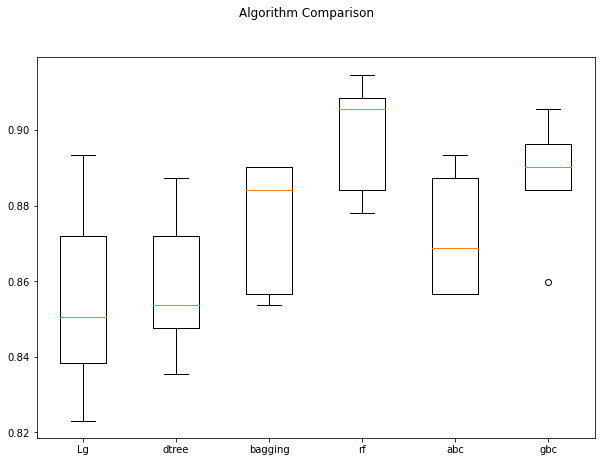

In [184]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results3)
ax.set_xticklabels(names)

plt.show()

#### Observations:
- Once again Random Forest is giving the highest cross-validated recall.
- This is followed by Gradient Boosting and Adaboost model.
- In the validation performance, Gradient Boosting performs slightly better than Random Forest. This is followed by Adaboost and Bagging Classifier model.  

### Best 3 performing models for further tuning
- The models built with oversampled data have the highest cross-validated recall.
- Even though models built with undersampled data have best validation performance, it is only slightly better than that of models built with oversampled data. 
- Also, we are losing a lot of information in the models built with undersampled data.
- Hence, we will select the best three models from the models built with oversampled data for further tuning. The top three models built with oversampled data with highest cross-validated recall are
1. Random Forest
2. Bagging
3. Decision Tree

## HyperparameterTuning 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Tuning Random Forest with oversampled data

In [185]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, 
                                   scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9780324400564175:


In [186]:
# building model with best parameters
rf_tuned = RandomForestClassifier(
    random_state=1,
    n_estimators=250,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features='sqrt',
)

# Fit the model on OverSampled training data
rf_tuned.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=250,
                       random_state=1)

**Checking model performance on train set**

In [187]:
# Calculating different metrics on train set
rf_tuned_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train_over, y_train_over
)
print("Training performance:")
rf_tuned_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,0.999,1.000,1.000


**Checking model performance on validation set**

In [188]:
# Calculating different metrics on validation set
rf_tuned_val_perf = model_performance_classification_sklearn(rf_tuned, X_val, y_val)
print("Validation performance:")
rf_tuned_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.990,0.872,0.948,0.909


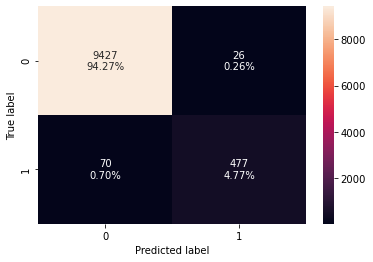

In [189]:
# creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_val, y_val)

#### Observations:
- As compared to the untuned model (validation recall = 0.868), the validation recall of the tuned model is slightly higher at 0.872.

### Tuning Bagging with oversampled Data

In [190]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_samples': [0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9],
              'n_estimators' : [30,50,70],}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, 
                                   scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'max_samples': 1, 'max_features': 0.7} with CV score=1.0:


In [191]:
# building model with best parameters
bagging_tuned = BaggingClassifier(
    random_state=1,
    n_estimators=50,
    max_samples=1,
    max_features=0.7,
)

# Fit the model on OverSampled training data
bagging_tuned.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=50,
                  random_state=1)

**Checking model performance on train set**

In [192]:
# Calculating different metrics on train set
bagging_tuned_train_perf = model_performance_classification_sklearn(
    bagging_tuned, X_train_over, y_train_over
)
print("Training performance:")
bagging_tuned_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.500,1.000,0.500,0.667


**Checking model performance on validation set**

In [193]:
# Calculating different metrics on validation set
bagging_tuned_val_perf = model_performance_classification_sklearn(bagging_tuned, X_val, y_val)
print("Validation performance:")
bagging_tuned_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.055,1.000,0.055,0.104


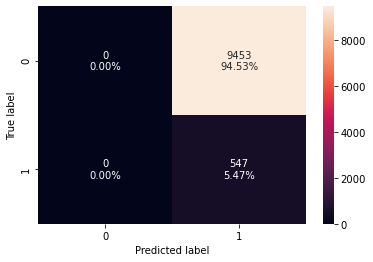

In [194]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_tuned, X_val, y_val)

#### Observations:
- In the validation set, the tuned Bagging Classifier with oversampled data has predicted everything as target=1, meaning everything as generator failure. We would not want such a model that predicts everything as failure. Then there is no point in building a model. 

### Tuning Decision tree with oversampled data

In [195]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, 
                                   scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.8526093088857545:


In [196]:
# building model with best parameters
dtree_tuned = DecisionTreeClassifier(
    random_state=1,
    min_samples_leaf=7,
    min_impurity_decrease=0.0001,
    max_leaf_nodes=15,
    max_depth=5,
)

# Fit the model on OverSampled training data
dtree_tuned.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

**Checking model performance on train set**

In [197]:
# Calculating different metrics on train set
dtree_tuned_train_perf = model_performance_classification_sklearn(
    dtree_tuned, X_train_over, y_train_over
)
print("Training performance:")
dtree_tuned_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.896,0.858,0.929,0.892


**Checking model performance on validation set**

In [198]:
# Calculating different metrics on validation set
dtree_tuned_val_perf = model_performance_classification_sklearn(dtree_tuned, X_val, y_val)
print("Validation performance:")
dtree_tuned_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.924,0.808,0.404,0.539


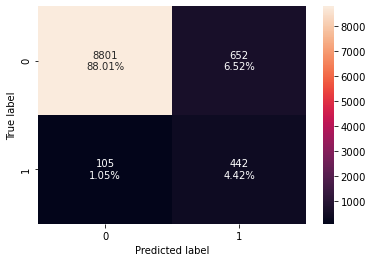

In [199]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_tuned, X_val, y_val)

#### Observations:
- The validation recall of the tuned Decision Tree model with oversampled data is slightly lower at 0.808 as compared to the untuned model (validation recall = 0.814)

## Model performance comparison and choosing the final model

In [200]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        rf_tuned_train_perf.T,
        bagging_tuned_train_perf.T,
        dtree_tuned_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest tuned with oversampled data",
    "Bagging Classifier tuned with oversampled data",
    "Decision Tree tuned with oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest tuned with oversampled data,Bagging Classifier tuned with oversampled data,Decision Tree tuned with oversampled data
Accuracy,1.000,0.500,0.896
Recall,0.999,1.000,0.858
Precision,1.000,0.500,0.929
F1,1.000,0.667,0.892


In [201]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        rf_tuned_val_perf.T,
        bagging_tuned_val_perf.T,
        dtree_tuned_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Random Forest tuned with oversampled data",
    "Bagging Classifier tuned with oversampled data",
    "Decision Tree tuned with oversampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Random Forest tuned with oversampled data,Bagging Classifier tuned with oversampled data,Decision Tree tuned with oversampled data
Accuracy,0.990,0.055,0.924
Recall,0.872,1.000,0.808
Precision,0.948,0.055,0.404
F1,0.909,0.104,0.539


#### Observations:
- We can see that the Bagging Classifier tuned with oversampled data has given the highest recall score of 1 in both the Train and Validation set. However in the validation set, it has predicted everything as generator failure. We would not want such a model that predicts everything as failure. Then there is no point in building a model. 
- The Random Forest tuned with oversampled data has given us the next highest validation recall of 0.872. The difference between the train and validation performance is not too high and hence it can be considered a generalized model and we will use this model as our final model.
- Let's check the performance of this model on the Test set and look at the feature importance as well. 

### Test set final performance

In [202]:
# Calculating different metrics on the test set 
rf_tuned_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
print("Test performance:")
rf_tuned_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.989,0.852,0.947,0.897


#### Observations:
- The performance on test data is generalised.

### Feature importances

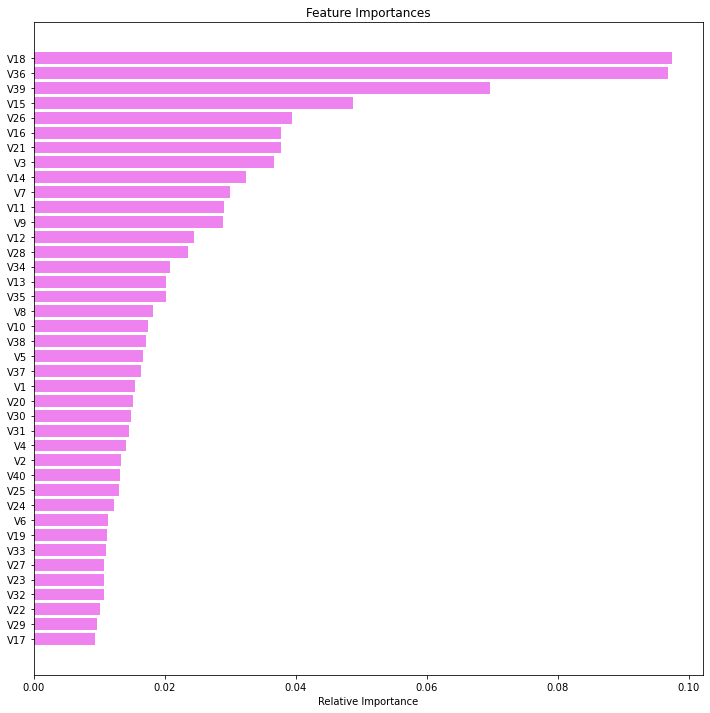

In [203]:
# Plotting the feature importances
feature_names = X_train.columns
importances =  rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
- V18 is the most important feature. This is closely followed by V36.
- V39 and V15 are the next two important features. 

## Pipelines to build the final model


In [204]:
# Separating target variable and other variables
X1 = df.drop(columns="Target")
Y1 = df["Target"]

# Since we already have a separate test set, we don't need to divide data into train and test
X_test1 = dft.drop(columns="Target")
y_test1 = dft["Target"]

In [205]:
# We can't oversample data without doing missing value treatment, so let's first treat the missing values in the train set
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)

# let's treat the missing values in the test set
X_test1 = imputer.transform(X_test1)

In [206]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_over1, y_over1 = sm.fit_resample(X1, Y1)

In [207]:
# Creating new pipeline with best parameters
model = Pipeline(steps=[("RandomForest", RandomForestClassifier(
    random_state=1, n_estimators=250, min_samples_leaf=1, max_samples=0.6, max_features='sqrt',),),])
# Fit the model on training data
model.fit(X_over1, y_over1)

Pipeline(steps=[('RandomForest',
                 RandomForestClassifier(max_features='sqrt', max_samples=0.6,
                                        n_estimators=250, random_state=1))])

In [208]:
# transforming and predicting on test data
model.predict(X_test1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Business Insights and Conclusions

* We have been able to build a predictive model that company can deploy to help identify failures so that the generator could be repaired before failing/breaking to reduce the maintenance cost. 

* The different costs associated with maintenance are as follows:

Replacement cost = $40,000
Repair cost = $15,000
Inspection cost = $5,000

* As we can see, the replacement cost is twice that of repair and inspection cost. Hence it is critical that the company uses this predictive model to identify failures before the generator fails/breaks. 

* Top 4 predictors that cause generator failure - V18, V36, V39 and V15

* Company can use these four predictors to build a profile to determine whether or not to inspect the generator. For example, if all four predictors are present, the generator would be inspected.  

***